# Deep Learning – Regression (TensorFlow / Keras)

This notebook is part of the **ML-Methods** project.

It introduces **Deep Learning for supervised regression**
using **TensorFlow / Keras**.

As with all other notebooks in this project,
the initial sections focus on data preparation
and are intentionally repeated.

This ensures:
- consistency across models
- fair comparison of results
- a unified learning pipeline

-----------------------------------------------------

## Notebook Roadmap (standard ML-Methods)

1. Project setup and common pipeline  
2. Dataset loading  
3. Train-test split  
4. Feature scaling (why we do it)  

----------------------------------

5. What is this model? (Intuition)  
6. Model training  
7. Model behavior and key parameters  
8. Predictions  
9. Model evaluation  
10. When to use it and when not to  
11. Model persistence  
12. Mathematical formulation (deep dive)  
13. Final summary – Code only  

-----------------------------------------------------

## How this notebook should be read

This notebook is designed to be read **top to bottom**.

Before every code cell, you will find a short explanation describing:
- what we are about to do
- why this step is necessary
- how it fits into the overall process

Compared to PyTorch:
- Keras reduces boilerplate code
- training is handled via `.fit()`
- gradients and updates are abstracted away

-----------------------------------------------------

## What is Deep Learning Regression (in this context)?

Deep Learning regression refers to using
multi-layer neural networks to predict
a **continuous numerical target**.

The model learns a mapping:

input features → continuous output

This allows the network to capture:
- non-linear relationships
- feature interactions
- complex patterns in tabular data

-----------------------------------------------------

## What you should expect from the results

With Deep Learning (TensorFlow / Keras regression), you should expect:

- non-linear regression capability
- strong performance on complex patterns
- high sensitivity to feature scaling
- training behavior similar to PyTorch

However:
- interpretability is low
- hyperparameter tuning can matter
- overfitting is possible on limited data

-----------------------------------------------------


___
## 1. Project setup and common pipeline

In this section we set up the common pipeline
used across regression models in this project.

Although this notebook uses TensorFlow / Keras,
the surrounding workflow remains consistent
with all other regression notebooks.


In [6]:
# ====================================
# Common imports used across regression models
# ====================================

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

from pathlib import Path
import joblib
import matplotlib.pyplot as plt

# ====================================
# TensorFlow / Keras imports
# ====================================

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


### What changes with TensorFlow / Keras

Compared to scikit-learn:
- model definition is more flexible
- training is explicit via `.fit()`

Compared to PyTorch:
- training loops are hidden
- gradients and updates are handled automatically

In the next section,
we will load the regression dataset.


___
## 2. Dataset loading

In this section we load the dataset
used for the deep learning regression task.

We use the same regression dataset
adopted in the other regression notebooks
to ensure fair comparison.


In [7]:
# ====================================
# Dataset loading
# ====================================

data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target


### Inputs and target

- `X` contains the input features
- `y` contains the continuous target variable

This is a supervised regression problem.

In the next section,
we split the dataset into training and test sets.


___
## 3. Train-test split

In this section we split the dataset
into training and test sets.

This allows us to evaluate
generalization on unseen data.


In [8]:
# ====================================
# Train-test split
# ====================================

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


### Why this matters

The model must be evaluated on unseen data
to obtain realistic performance.

In the next section,
we apply feature scaling,
which is mandatory for neural networks.


___
## 4. Feature scaling (why we do it)

In this section we apply feature scaling
to the input features.

For deep learning regression models,
feature scaling is mandatory.


In [9]:
# ====================================
# Feature scaling
# ====================================

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Why scaling is essential

Neural networks are trained using gradients.

Standardization:
- stabilizes optimization
- improves convergence speed
- prevents unstable training behavior

In the next section,
we explain what the model is doing conceptually.


___
## 5. What is this model? (Deep Learning Regression – TensorFlow / Keras)

Before training the model,
it is crucial to understand
what a neural network is doing
when it is used for **regression**.

In regression,
the objective is to predict a **continuous numerical value**,
not a category or class.


### What problem are we solving?

Each data point is represented by:
- multiple numerical input features
- one continuous target value

The goal of the model is to learn a function:

input features → numerical output

This function should approximate
the true underlying relationship
between inputs and target.


### How a neural network represents the problem

A neural network treats each input sample as:
- a point in a high-dimensional space
- where each feature is one dimension

The network learns how to map
this point in input space
to a single value on the output axis.


### What each layer does conceptually

Each layer performs two operations:

1. **Linear transformation**  
   A weighted combination of inputs  
   (what to look at and how strongly)

2. **Non-linear transformation**  
   An activation function introduces flexibility  
   (how to bend the function)

By stacking layers:
- simple patterns are combined
- complex relationships emerge


### What each layer does conceptually

Each layer performs two operations:

1. **Linear transformation**  
   A weighted combination of inputs  
   (what to look at and how strongly)

2. **Non-linear transformation**  
   An activation function introduces flexibility  
   (how to bend the function)

By stacking layers:
- simple patterns are combined
- complex relationships emerge


### Why non-linearity matters in regression

Without non-linearity:
- the model would reduce to linear regression
- no additional expressive power would be gained

ReLU activation allows the model to:
- learn piecewise linear functions
- adapt to complex data structures
- approximate highly non-linear mappings


### Why the output layer is linear

In regression:
- the output is a real number
- values are not bounded
- there is no probability interpretation

A linear output layer ensures:
- unrestricted numerical predictions
- compatibility with error-based loss functions


### How learning happens (high-level view)

Training consists of repeating the following steps:

1. The model makes a prediction  
2. The prediction is compared to the true value  
3. An error is computed (loss)  
4. Model parameters are adjusted  
5. The process repeats  

Over time,
the network adjusts its internal parameters
to reduce prediction error.


### What TensorFlow / Keras abstracts for us

Keras automatically handles:
- forward pass
- loss computation
- gradient calculation
- parameter updates

This allows us to focus on:
- model design
- data preparation
- result interpretation

Rather than low-level mechanics.


### Key takeaway

A deep learning regression model:
- learns a non-linear mapping
- approximates a continuous function
- improves through iterative error reduction

Understanding this conceptual process
is more important than memorizing code.

In the next section,
we will see how this concept
is translated into an actual model.


___
## 6. Model training (TensorFlow / Keras Regression)

In this section we define and train
a neural network regressor using Keras.

The model outputs a single value,
so the output layer has **1 neuron**
and uses a linear activation.


In [10]:
# ====================================
# Model definition (Keras)
# ====================================

model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)  # regression output
])


In [11]:
# ====================================
# Model compilation
# ====================================

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mae"]
)


In [12]:
# ====================================
# Model training
# ====================================

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    batch_size=32,
    verbose=0
)


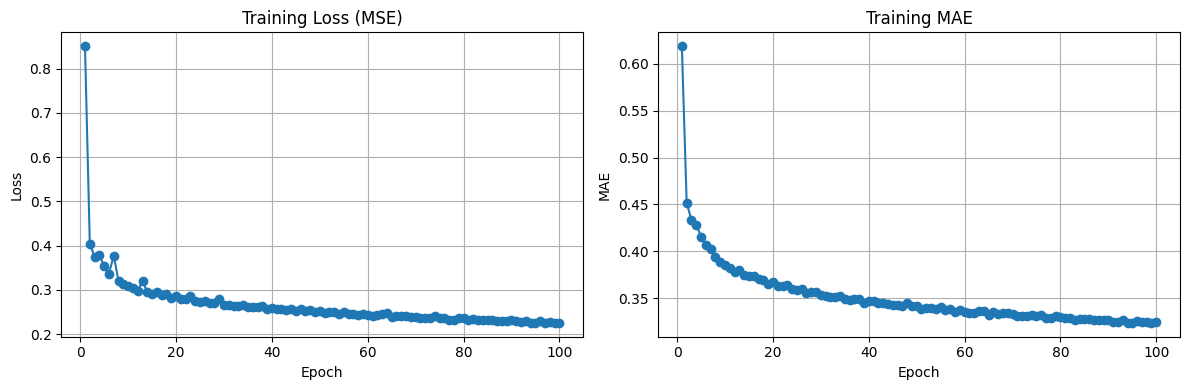

In [13]:
# ====================================
# Training history visualization
# ====================================

history_dict = history.history
epochs = range(1, len(history_dict["loss"]) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict["loss"], marker="o")
plt.title("Training Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict["mae"], marker="o")
plt.title("Training MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.grid(True)

plt.tight_layout()
plt.show()


### What we just did

- defined a regression neural network
- compiled it with MSE loss and Adam optimizer
- trained it for 100 epochs without printing output
- visualized the learning curves

In the next section,
we analyze model behavior and key parameters.


____
## 7. Model behavior and key parameters

In this section we analyze
how the TensorFlow / Keras regression model behaves
and which parameters most strongly influence learning.

Although Keras hides the training loop,
the underlying behavior follows
standard deep learning principles.


### Model capacity and architecture

Model capacity refers to
how complex a function the network can represent.

Capacity is controlled by:
- number of layers
- number of neurons per layer
- choice of activation functions

In this notebook:
- two hidden layers are used
- with 64 and 32 neurons respectively

This provides a balance between:
- expressive power
- generalization ability


### Effect of increasing model capacity

Increasing capacity allows the model to:
- fit more complex patterns
- capture subtle feature interactions

However:
- excessive capacity increases overfitting risk
- the model may learn noise instead of structure

Capacity must always be evaluated
relative to dataset size.


### Role of activation functions

ReLU activation:
- introduces non-linearity
- avoids vanishing gradient issues
- enables piecewise linear approximations

Without activation functions:
- additional layers would be useless
- the network would collapse to a linear model


### Loss function behavior

The model is trained using Mean Squared Error (MSE).

MSE:
- penalizes large errors more strongly
- encourages overall accuracy
- is differentiable and stable

This makes it suitable
for continuous-value prediction.


### Optimization dynamics (Adam)

The Adam optimizer:
- adapts learning rates automatically
- stabilizes training
- converges faster than plain gradient descent

Adam helps the model:
- escape poor local solutions
- handle noisy gradients
- train reliably without heavy tuning


### Training duration (epochs)

Each epoch represents:
- one full pass over the training data

More epochs:
- reduce training error
- increase risk of overfitting

Too few epochs:
- lead to underfitting
- prevent full learning

Monitoring learning curves
is essential to understand this trade-off.


### Sensitivity to feature scaling

Neural networks are highly sensitive
to the scale of input features.

Without scaling:
- gradients become unstable
- learning slows or fails
- training may diverge

Standardization is therefore
an essential component of the model,
not an optional preprocessing step.


### Generalization behavior

Good generalization occurs when:
- training error decreases
- test error remains low

Poor generalization (overfitting) occurs when:
- training error is very small
- test error stops improving or increases

This behavior must be checked
on unseen data.


### Key takeaway

The behavior of a deep learning regression model
is governed by:
- architecture
- optimization strategy
- training duration
- data preprocessing

Understanding these elements
is essential to diagnose model performance
and make informed design decisions.


___
## 8. Predictions

In this section we generate predictions
using the trained TensorFlow / Keras regression model.

For regression:
- predictions are **continuous numerical values**
- each input sample produces **one output number**
- there are no class labels or probabilities

The goal is to obtain:
- `y_pred`: predicted target values for the test set

These predictions will be compared to:
- `y_test`: the true target values
in the evaluation section.


In [14]:
# ====================================
# Predictions
# ====================================

y_pred = model.predict(X_test_scaled).flatten()


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step


### What happens inside `model.predict()`

When calling `model.predict()`:
- the model performs a forward pass on `X_test_scaled`
- each Dense layer applies its learned transformation
- the final layer outputs a single real number per sample

Important:
- no training happens here
- weights are not updated
- the model is only applying what it has learned


### What we have after this step

- `y_test`: true continuous values (ground truth)
- `y_pred`: predicted continuous values

We now need to quantify:
- how close predictions are to true values
- how large the typical error is
- whether the model generalizes well

In the next section,
we evaluate performance using regression metrics.


___
## 9. Model evaluation

In this section we evaluate the regression model
using standard regression metrics.

Regression evaluation focuses on:
- **prediction error magnitude**
- **sensitivity to large errors**
- **overall fit quality**

We compute:
- MSE (Mean Squared Error)
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)
- R² score (coefficient of determination)


In [15]:
# ====================================
# Regression evaluation metrics
# ====================================

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, rmse, mae, r2


(0.26502627885126145,
 np.float64(0.5148070306933089),
 0.3496456228591051,
 0.7977530044039882)

### Mean Squared Error (MSE)

MSE measures the average squared difference:

- squaring makes large errors count much more
- useful when large mistakes are particularly costly
- harder to interpret directly because it is in squared units


### Root Mean Squared Error (RMSE)

RMSE is the square root of MSE:

- brings the error back to the same unit as the target
- directly answers: **"on average, how wrong are we?"**
- penalizes large errors more than MAE

This is often the most interpretable metric
in real-world Srin regression problems.


### Mean Absolute Error (MAE)

MAE measures average absolute error:

- easier to interpret than MSE
- less sensitive to outliers than RMSE
- reflects typical deviation without squaring

MAE is often preferred when:
- you want a robust average error measure
- outliers should not dominate evaluation


### R² score (coefficient of determination)

R² measures how much of the target variance
is explained by the model:

- R² = 1 → perfect prediction
- R² = 0 → similar to predicting the mean for everything
- R² < 0 → worse than a baseline predictor

R² describes *fit quality*,
while RMSE/MAE describe *error magnitude*.


### How to read these results together

No single metric is sufficient.

A good regression model typically shows:
- low RMSE
- low MAE
- high R²

However:
- high R² does not guarantee low absolute error
- low error on training does not guarantee generalization

Metrics must always be computed on unseen data,
as done in this notebook.


### Optional but useful: quick visual check

Even with good numerical metrics,
it is often helpful to visualize:

- predicted vs true values
- residuals (errors)

This can reveal:
- systematic bias
- underestimation / overestimation patterns
- outlier behavior

(We keep plots optional to maintain consistency,
but they are valuable in real-world workflows.)


____
## 10. When to use it and when not to

Deep Learning regression with TensorFlow / Keras
can be very effective,
but it is not always the best tool.

Model choice should consider:
- data complexity
- dataset size
- interpretability requirements
- training resources and maintainability


### When to use TensorFlow / Keras regression

TensorFlow / Keras regression is a good choice when:

- relationships are strongly non-linear
- feature interactions are complex
- classical models (linear regression, ridge, lasso) underperform
- you need a flexible model that can grow with data
- deployment is a goal (TensorFlow ecosystem)

It is commonly used for:
- scalable production pipelines
- rapid experimentation and prototyping
- deep learning systems with future expansion


### When NOT to use it

It may not be ideal when:

- the dataset is small or noisy
- the problem is close to linear
- interpretability is critical
- training time or resources are limited
- a simpler model achieves similar RMSE/MAE

In these cases,
classical regression models
are often preferable.


### Warning signs in practice

You should be cautious if:

- training loss keeps decreasing
  but test metrics do not improve
- the model becomes sensitive to random initialization
- results vary too much across runs
- performance gains are marginal compared to simpler models

These are typical indicators
that deep learning may be unnecessary
or that regularization is needed.



### Key takeaway

TensorFlow / Keras regression is powerful
when the problem justifies model complexity.

It should be chosen when:
- you need non-linear function approximation
- you have enough data
- the performance gain matters

Otherwise,
simpler models may provide the same value
with lower cost and higher interpretability.


___
## 11. Model persistence

In this section we save:
- the trained TensorFlow / Keras regression model
- the scaler used for preprocessing

Saving the full pipeline ensures:
- reproducibility
- correct inference on future data
- separation of training and deployment


In [ ]:
# ====================================
# Model persistence
# ====================================

model_dir = Path("models/supervised_learning/regression/deep_learning_tensorflow")
model_dir.mkdir(parents=True, exist_ok=True)

# Save full Keras model (architecture + weights + config)
model.save(model_dir / "tensorflow_keras_regression_model")

# Save scaler used during training
joblib.dump(scaler, model_dir / "scaler.joblib")


### What we saved and why

We saved the full Keras model so that:
- we do not need to redefine the architecture later
- weights and configuration are restored automatically

We saved the scaler because:
- neural networks depend heavily on feature scaling
- using different scaling would change the meaning of inputs
- consistent preprocessing is essential for reliable predictions


### Reuse workflow (conceptual)

To reuse the model later:
1. load the scaler
2. scale new input data
3. load the Keras model
4. predict continuous values

This ensures inference is consistent with training.


___
## 12. Mathematical formulation (deep dive)

This section describes the mathematical structure
behind deep learning regression.

The focus is on:
- how the network computes predictions
- what is minimized during training
- why optimization works iteratively


### Supervised regression dataset

We train on pairs:

$$
\{(x_i, y_i)\}_{i=1}^{n}
$$

where:
- $$x_i \in \mathbb{R}^d$$ is a feature vector$$
- $$y_i \in \mathbb{R}$$ is a continuous target$$


### Neural network as a function

The model learns a function:

$$
\hat{y} = f(x; \theta)
$$

where:
- $$\theta$$ includes all weights and biases$$
- $$\hat{y}$$ is the predicted value$$


### Dense layer computation

A Dense layer computes:

$$
z = W x + b
$$

Then applies a non-linearity:

$$
h = \phi(z)
$$

In this notebook, the activation is ReLU:

$$
\phi(z) = \max(0, z)
$$


### Output layer for regression

The last layer is linear:

$$
\hat{y} = W_{\text{out}} h + b_{\text{out}}
$$

This is necessary because regression outputs
must remain unrestricted real numbers.


### Loss function (MSE)

Training minimizes Mean Squared Error:

$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

The model learns by adjusting parameters
to reduce this quantity over iterations.


### Gradient-based optimization

Parameters are updated iteratively:

$$
\theta \leftarrow \theta - \eta \nabla_{\theta} MSE
$$

where:

- $$\eta$$ is the learning rate$$
- gradients indicate how parameters should change

Keras performs this automatically
when calling `.fit()`.


### Final takeaway

Deep learning regression is:
- non-linear function approximation
- trained by minimizing prediction error (MSE)
- optimized iteratively using gradients

The mathematical components are simple,
but their composition yields powerful models.


___
## 13. Final summary – Code only

The following cell contains the complete
TensorFlow / Keras regression pipeline.

No explanations are provided here.


In [ ]:
# ====================================
# Imports
# ====================================

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from pathlib import Path
import joblib
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# ====================================
# Dataset loading
# ====================================

data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target


# ====================================
# Train-test split
# ====================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# ====================================
# Feature scaling
# ====================================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# ====================================
# Model definition
# ====================================

model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)
])


# ====================================
# Model compilation
# ====================================

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mae"]
)


# ====================================
# Model training
# ====================================

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    batch_size=32,
    verbose=0
)


# ====================================
# Training history visualization
# ====================================

history_dict = history.history
epochs = range(1, len(history_dict["loss"]) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict["loss"], marker="o")
plt.title("Training Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict["mae"], marker="o")
plt.title("Training MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.grid(True)

plt.tight_layout()
plt.show()


# ====================================
# Predictions
# ====================================

y_pred = model.predict(X_test_scaled).flatten()


# ====================================
# Evaluation
# ====================================

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, rmse, mae, r2


# ====================================
# Model persistence
# ====================================

model_dir = Path("models/supervised_learning/regression/deep_learning_tensorflow")
model_dir.mkdir(parents=True, exist_ok=True)

model.save(model_dir / "tensorflow_keras_regression_model")
joblib.dump(scaler, model_dir / "scaler.joblib")
